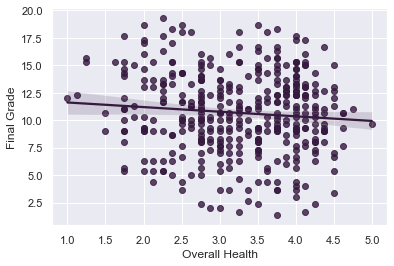

<Figure size 1008x504 with 0 Axes>

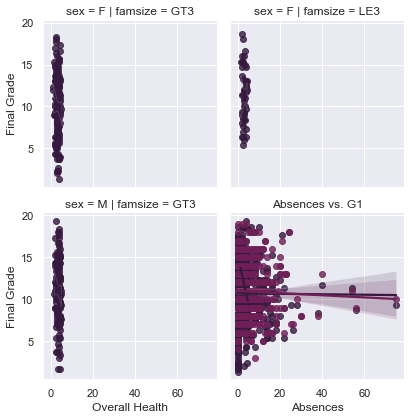

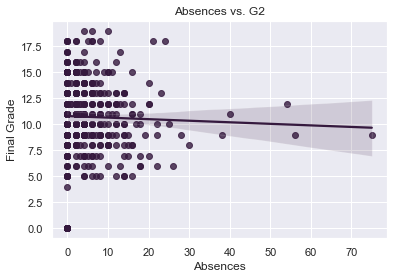

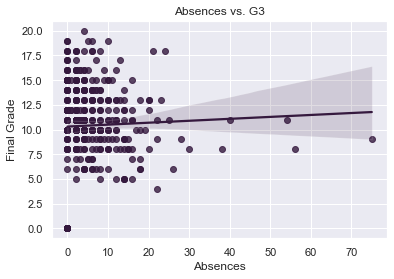

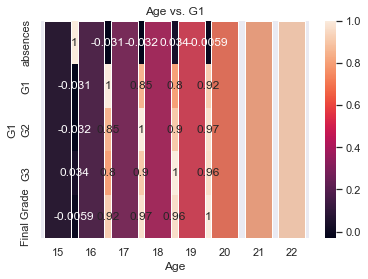

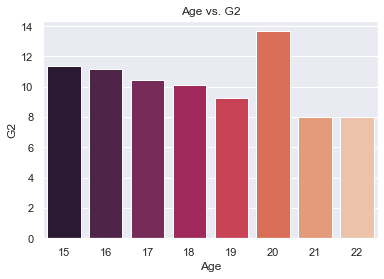

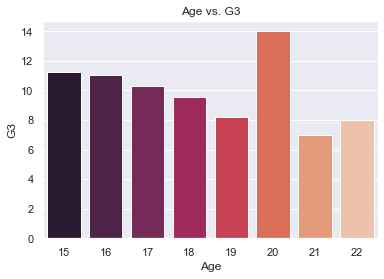

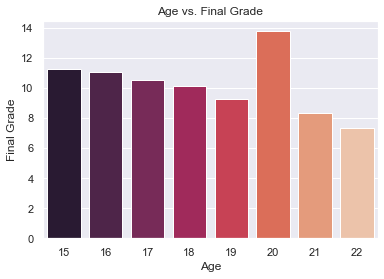

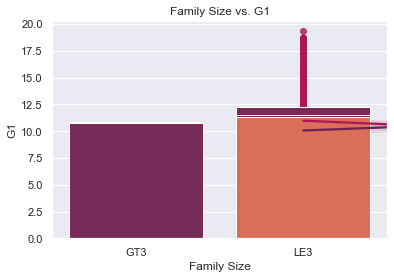

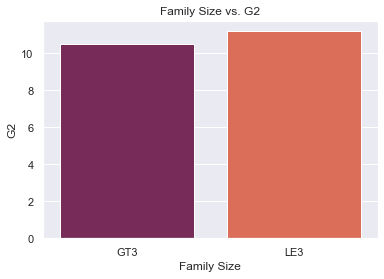

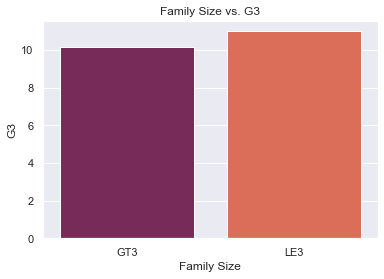

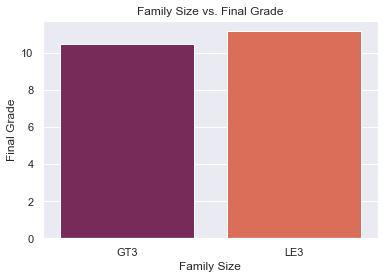

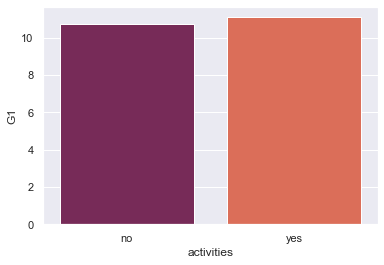

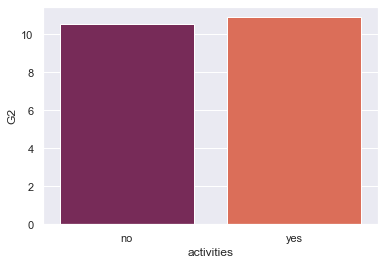

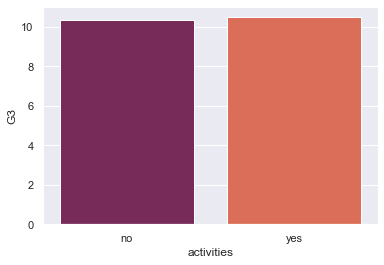

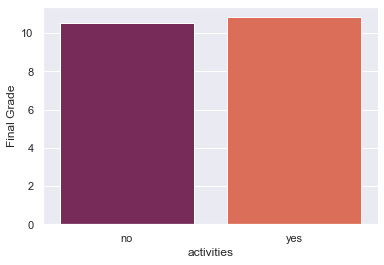

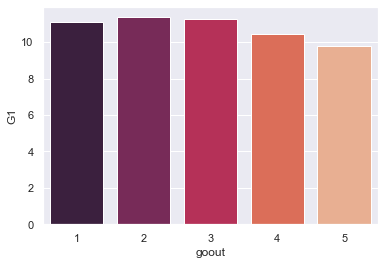

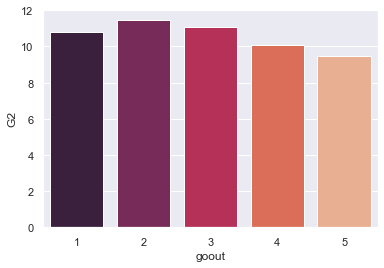

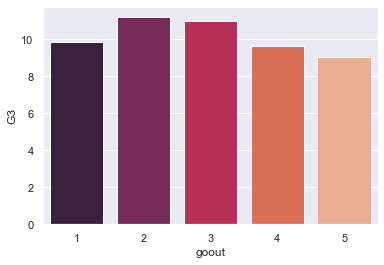

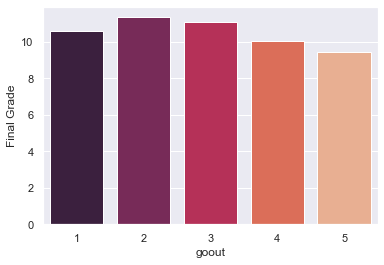

In [3]:
# Data Analysis
import numpy as np 
import pandas as pd 

# Visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#configuration for seaborn and matplotlib
plt.rcParams["font.family"] = "monospace"
sns.set_theme(style='darkgrid', palette='rocket')

file = pd.read_csv("E:\Data Mining\Assignment\student_data.csv")


file.head()

file.columns

# Final grade column for each entry
file['Final Grade'] = (file["G1"] + file['G2'] + file['G3']) / 3

# An overall health column for each entry
file['Overall Health'] = (0.5 * file['Dalc'] + 0.5 * file['Walc'] + 2 * file['health'] + file['famrel']) / 4

# Store all the metrics used in the EDA
all_metrics = ['G1', 'G2', 'G3', "Final Grade"]

sns.regplot(x='Overall Health', y='Final Grade', data=file)

plt.figure(figsize=(14, 7))
grid = sns.FacetGrid(file, col='famsize', row='sex')
grid.map(sns.regplot, 'Overall Health', 'Final Grade')


sns.regplot(x='absences', y='Final Grade', data=file)

individual_metrics = ['G1', 'G2', 'G3']

for metric in individual_metrics:
    sns.regplot(x='absences', y=metric, data=file).set(xlabel='Absences', ylabel='Final Grade', title=f'Absences vs. {metric}')
    plt.show()
    
    
sns.heatmap(file[['absences', 'G1', 'G2', 'G3', 'Final Grade']].corr(), annot=True)


size_rel = file.groupby("famsize").aggregate({"famrel": "mean"})
size_rel.reset_index(inplace=True)

sns.barplot(x='famsize', y='famrel', data=size_rel).set(xlabel='Family Size', ylabel='Family Relationship', title='Fam. Size vs. Fam. Rel.')


file['famrel'].mean()


# Visualize distribution of `age`
sns.histplot(x='age', data=file, kde=True)

age_grade = file.groupby("age").aggregate({'Final Grade': 'mean', 'G1': 'mean', 'G2': 'mean', 'G3': 'mean'})
age_grade.reset_index(inplace=True)
age_grade


for metric in all_metrics:
    sns.barplot(data=age_grade, x='age', y=metric, palette='rocket').set(xlabel='Age', ylabel=metric, title=f'Age vs. {metric}')
    plt.show()
    
    
mjob_edu = file.groupby("Mjob").aggregate({"Medu": "mean"})
mjob_edu.reset_index(inplace=True)
mjob_edu.sort_values(by='Medu', ascending=False, inplace=True)


sns.barplot(x='Mjob', y='Medu', data=mjob_edu).set(xlabel='Job', ylabel='Education Lvl.', title='Job vs. Edu. Lvl. (Mother)')


fjob_edu = file.groupby("Fjob").aggregate({"Fedu": "mean"})
fjob_edu.reset_index(inplace=True)
fjob_edu.sort_values(by='Fedu', ascending=False, inplace=True)


sns.barplot(x='Fjob', y='Fedu', data=fjob_edu).set(xlabel='Job', ylabel='Education Lvl.', title='Job vs. Edu. Lvl. (Father)')


file['Time Productivity'] = 0.5 * file['traveltime'] + 2 * file['studytime']
sns.regplot(x='Time Productivity', y='Final Grade', data=file)


sns.regplot(x='studytime', y='Final Grade', data=file)

sns.regplot(x='traveltime', y='Final Grade', data=file)


mjob_gr = file.groupby("Mjob").aggregate({"Final Grade": "mean"}).reset_index()
mjob_gr

sns.barplot(data=mjob_gr, x='Mjob', y='Final Grade', palette='rocket').set(xlabel='Job', ylabel='Final Grade', title='Job vs. Grade (Mother)')

fjob_gr = file.groupby("Fjob").aggregate({"Final Grade": "mean"}).reset_index()
fjob_gr


sns.barplot(data=fjob_gr, x='Fjob', y='Final Grade', palette='rocket').set(xlabel='Job', ylabel='Final Grade', title='Job vs. Grade (Father)')


size_gr = file.groupby("famsize").aggregate({"Final Grade": "mean", "G1": "mean", "G2": "mean", "G3": "mean"}).reset_index()
size_gr


for metric in all_metrics:
    sns.barplot(data=size_gr, x='famsize', y=metric, palette='rocket').set(xlabel='Family Size', ylabel=metric, title=f'Family Size vs. {metric}')
    plt.show()
    
    
act_gr = file.groupby("activities").aggregate({"Final Grade": "mean", "G1": "mean", "G2": "mean", "G3": "mean"}).reset_index()
act_gr


for metric in all_metrics:
    sns.barplot(data=act_gr, x='activities', y=metric, palette='rocket')
    plt.show()
    
    
out_gr = file.groupby("goout").aggregate({"Final Grade": "mean", "G1": "mean", "G2": "mean", "G3": "mean"}).reset_index()
out_gr



for metric in all_metrics:
    sns.barplot(data=out_gr, x='goout', y=metric, palette='rocket')
    plt.show()
    
    
    
